In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Let's generate a theoritical signal
t1 = 0 #start time
t2 = 100 #end time
dt = 0.1 
time_vect = np.arange(t1,t2,dt) #Define a time vactor
#time_vect

#Model signal
signal = np.sin(time_vect/2)

#Add noise to the signal
noise_level = 1 #Noise
bckround_max = 3 #Background level

#create a noisy signal with background
noisy_signal = signal + (-(time_vect**2) + t2*time_vect)/(t2**2/4)*bckround_max + noise_level*np.random.rand(len(time_vect)) 

data = pd.read_csv('steps_acceleration.csv')
data.head()


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.010064,0.024022,0.058115,0.166339,0.177829
1,0.018090,0.024729,-0.011374,0.250006,0.251483
2,0.026116,-0.079039,-0.042216,0.152040,0.176481
3,0.034142,-0.155643,-0.035016,0.200107,0.255917
4,0.042199,-0.108200,-0.006264,0.147676,0.183180


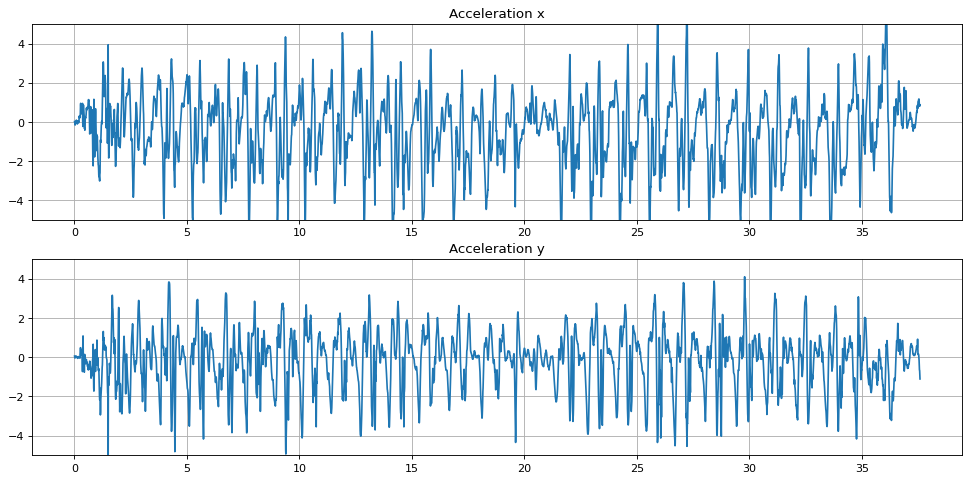

In [2]:
fig = plt.figure(num=None, figsize= (15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(data['Time (s)'],data['Linear Acceleration x (m/s^2)'])
plt.grid()
plt.ylim(-5,5)
plt.title('Acceleration x')
plt.subplot(2,1,2)
plt.plot(data['Time (s)'],data['Linear Acceleration y (m/s^2)'])
plt.title('Acceleration y')
plt.grid()
plt.ylim(-5,5)
plt.show()

In [3]:
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
    
def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

57.0


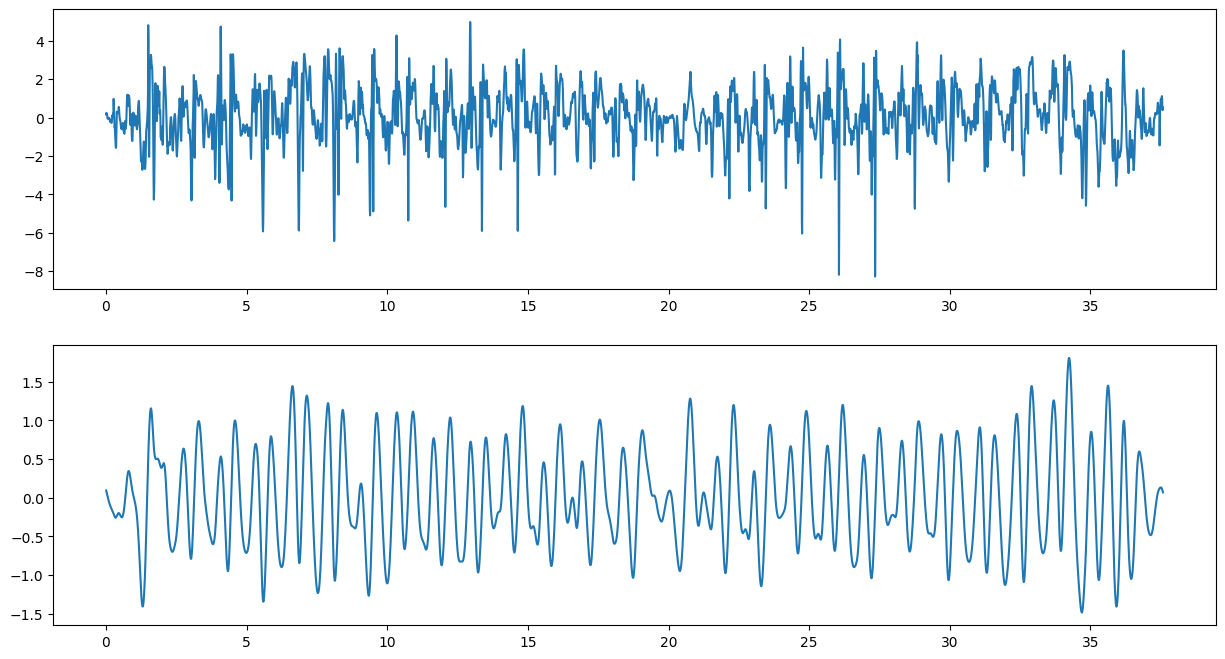

In [4]:
#Filter the data
noisy_signal = data['Linear Acceleration z (m/s^2)']
time = data['Time (s)']
order = 2
dt = (time[len(time)-1]- time[0])/len(time) #Time difference between consecutive observations, and called sampling interval

fs = 1/dt #Sampling rate
nyq = 0.5 * fs 
cutoff_H = 1/5 #Highpass cut-off
cutoff_L = 1/0.5 #Lowpass cut-off
#After this filtering we'll have only frequencies from 1/40 to 1/5 in the data 

lowpass_filered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order) #Filter out high frequencies
final_signal = butter_highpass_filter(lowpass_filered, cutoff_H, fs, nyq, order) #Filter out low frequencies

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(time,noisy_signal)
plt.subplot(2,1,2)
plt.plot(time,final_signal)

stepdata = final_signal
steps = 0
for i in range(stepdata.shape[0]-1):
    if stepdata[i]/stepdata[i+1] < 0:
        steps = steps + 0.5
print(steps)